In [1]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import jaccard_score
import pandas as pd
import re
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import copy
import numpy as np
import itertools
from scipy.sparse import csr_matrix
from sklearn.preprocessing import MinMaxScaler
from collections import Counter
from matplotlib.pyplot import figure
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
sns.set()

In [2]:
df = pd.read_csv('../dataset/Discovery_Cohort2020_08_25_forTing_imputed_fifth_min.csv')

In [3]:
# include both DLB and ctrl patients
names = df.columns[5:]
y = df['Diagnosis'].to_numpy()
y = np.where(y == 'DLB', 0, y)
y = np.where(y == 'CTRL', 1, y)
y = y.tolist()
X = df.iloc[:, 5:].to_numpy()
scaler=MinMaxScaler((-1,1))
X = scaler.fit_transform(X)

In [4]:
df_DLB_only = df[df['Diagnosis'] == 'DLB']

In [5]:
# include only DLB patients
X_DLB = df_DLB_only.iloc[:, 5:].to_numpy()
scaler=MinMaxScaler((-1,1))
X_DLB = scaler.fit_transform(X_DLB)
clustering_DLB = AgglomerativeClustering(n_clusters=2, linkage='complete').fit(X_DLB)
cluster_DLB_labels = clustering_DLB.labels_

In [6]:
pca = PCA(n_components=2)

In [7]:
pca.fit(X)

PCA(n_components=2)

In [8]:
clustering = AgglomerativeClustering(n_clusters=2, linkage='complete').fit(X)

In [9]:
clustering

AgglomerativeClustering(linkage='complete')

In [10]:
cluster_labels = clustering.labels_

In [11]:
np.count_nonzero(cluster_labels)

55

In [12]:
for c, i in enumerate(cluster_DLB_labels):
    if i == 1:
        cluster_labels[c+75] = 2 # offset control

In [13]:
from sklearn import decomposition
pca = decomposition.PCA(n_components=2)
pca.fit(X)
pca_X = pca.transform(X)

In [24]:
# dftsne = pd.DataFrame(pca)
# dftsne['cluster'] = cluster_labels
# dftsne.columns = ['x1','x2','cluster']

In [31]:
data = pd.DataFrame(pca_X, columns=['a', 'b'])

In [32]:
data['cluster_labels'] = cluster_labels
data['y'] = np.array(y)

In [33]:
data.columns

Index(['a', 'b', 'cluster_labels', 'y'], dtype='object')

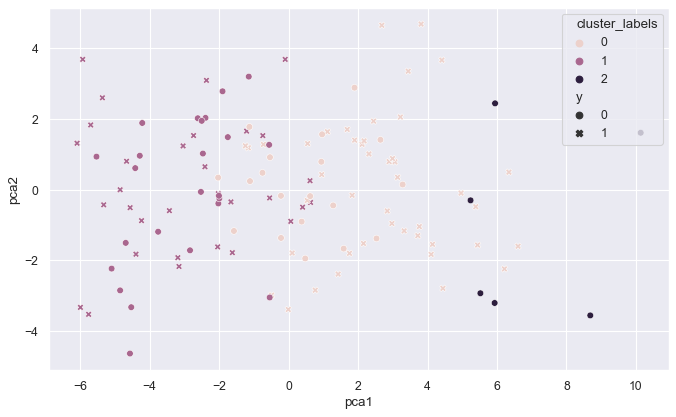

In [34]:
figure(num=None, figsize=(10, 6), dpi=80, facecolor='w', edgecolor='k')
# sns.scatterplot(x= pca_X[:, 0], y = pca_X[:, 1], hue = cluster_labels)
ax = sns.scatterplot(data=data, x="a", y='b', hue = "cluster_labels", style = "y")
ax.set_xlabel('pca1', fontsize=12)
ax.set_ylabel('pca2', fontsize=12)
plt.savefig('hierarchical_pca.jpeg', dpi=300, format='JPEG')

age

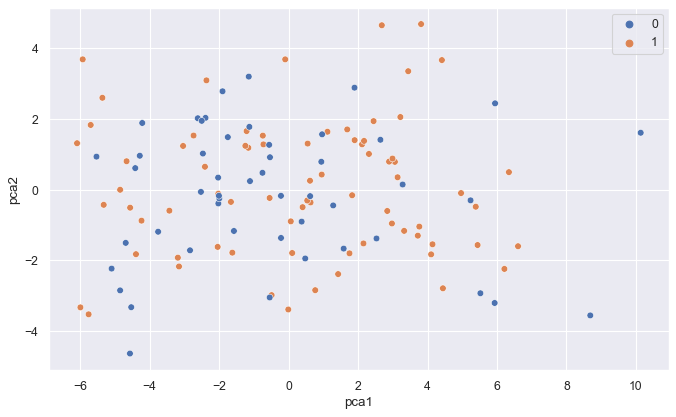

In [16]:
figure(num=None, figsize=(10, 6), dpi=80, facecolor='w', edgecolor='k')
# sns.scatterplot(x= pca_X[:, 0], y = pca_X[:, 1], hue = cluster_labels)
ax = sns.scatterplot(x= pca_X[:, 0], y = pca_X[:, 1], hue = y)
ax.set_xlabel('pca1', fontsize=12)
ax.set_ylabel('pca2', fontsize=12)
plt.savefig('hierarchical_pca.jpeg', dpi=300, format='JPEG')

In [17]:
cluster_num = 0

In [18]:
df_age = df_DLB_only.sort_values('Age')

In [19]:
df_age.iloc[0][4]

55

In [20]:
ages = []
for c, i in enumerate(cluster_labels):
    if i == cluster_num:
        ages.append(df_age.iloc[c][4])

IndexError: single positional indexer is out-of-bounds

In [ ]:
ax = sns.displot(ages)
ax.set_xlabels('Ages')
ax.set(xlim=(50,90), ylim=(0, 11))
# ax.set_ylim(0, 1)
# ax.set_xlabel('age', fontsize=12)
# ax.set_ylabel('correctly classified percentage', fontsize=12)
plt.savefig('age.jpeg', dpi=300, format='JPEG')

In [ ]:
gender = []
for c, i in enumerate(cluster_labels):
    if i == cluster_num:
        gender.append(df_age.iloc[c][3])

In [ ]:
ax = sns.displot(sorted(gender))
ax.set_xlabels('Gender')
ax.set(ylim=(0, 40))
plt.savefig('gender.jpeg', dpi=300, format='JPEG')

In [ ]:
mmse_df = pd.read_csv('../dataset/MMSE.csv')
mmse_df = mmse_df[df['Diagnosis'] == 'DLB']

In [ ]:
mmse_list = []
for c, i in enumerate(cluster_labels):
    if i == cluster_num:
        mmse_list.append(mmse_df.iloc[c][3])

In [ ]:
ax = sns.displot(mmse_list)
ax.set_xlabels("MMSE")
ax.set(xlim=(0, 30), ylim=(0,15))
plt.savefig('MMSE_dis.jpeg', dpi=300, format='JPEG')